５層のニューラルネットワークにランダムな重みを入力し、各層のアクティベーション分布を観察します

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

In [3]:
node_num = 100
hidden_layer_size = 5

In [16]:
def plot_histogram(distributions):
    plt.figure(figsize=(16, 14))
    n = len(distributions)
    m = hidden_layer_size
    index = 1
    for i, key in enumerate(distributions.keys()):
        for j, distribution in enumerate(distributions[key]):
            plt.subplot(n, m, index)
            plt.title("{}: {}-layer".format(key, j + 1))
            if j != 0:
                plt.yticks([], [])
            plt.hist(distribution.flatten(), bins=30, range=(0, 1))
            index += 1

    plt.show()

In [14]:
def test_weight_init_compare():
    distributions = {}
    weights = {'weight=1.0': 1.0, 'weight=0.1': 0.1, 'weight=0.01': 0.01, 'weight=0.001': 0.001}

    for key, value in weights.items():
        input_data = np.random.rand(1000, 100)
        distributions[key] = []
        for layer_idx in range(hidden_layer_size):
            w = np.random.randn(node_num, node_num) * value
            a = np.dot(input_data, w)
            z = sigmoid(a)
            distributions[key].append(z)
            x = z

    plot_histogram(distributions)

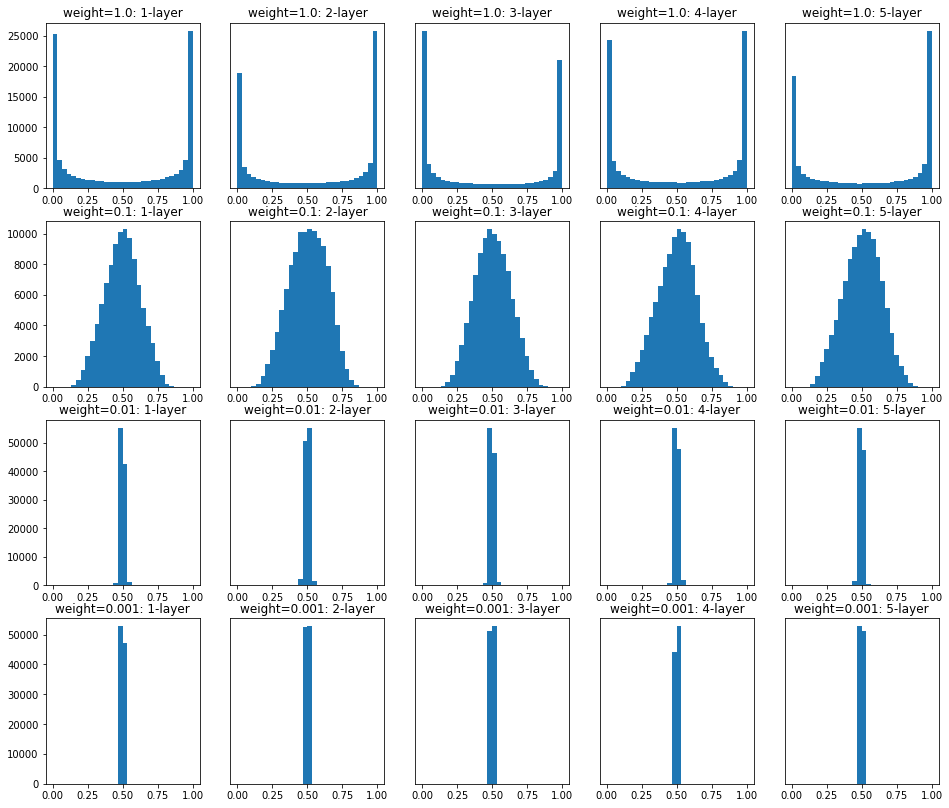

In [17]:
test_weight_init_compare()

In [22]:
def test_activation_distribution():
    """
    異なる活性化関数を使用し隠れ層の分布を観察します
    """
    weight = 0.1
    activations = {'sigmoid': sigmoid, 'relu': ReLU, 'tanh': tanh}
    distributions = {}
    for key, func in activations.items():
        input_data = np.random.rand(1000, 100)
        distributions[key] = []
        for layer_idx in range(hidden_layer_size):
            w = np.random.randn(node_num, node_num) * weight
            a = np.dot(input_data, w)
            z = func(a)
            distributions[key].append(z)
            x = z

    plot_histogram(distributions)

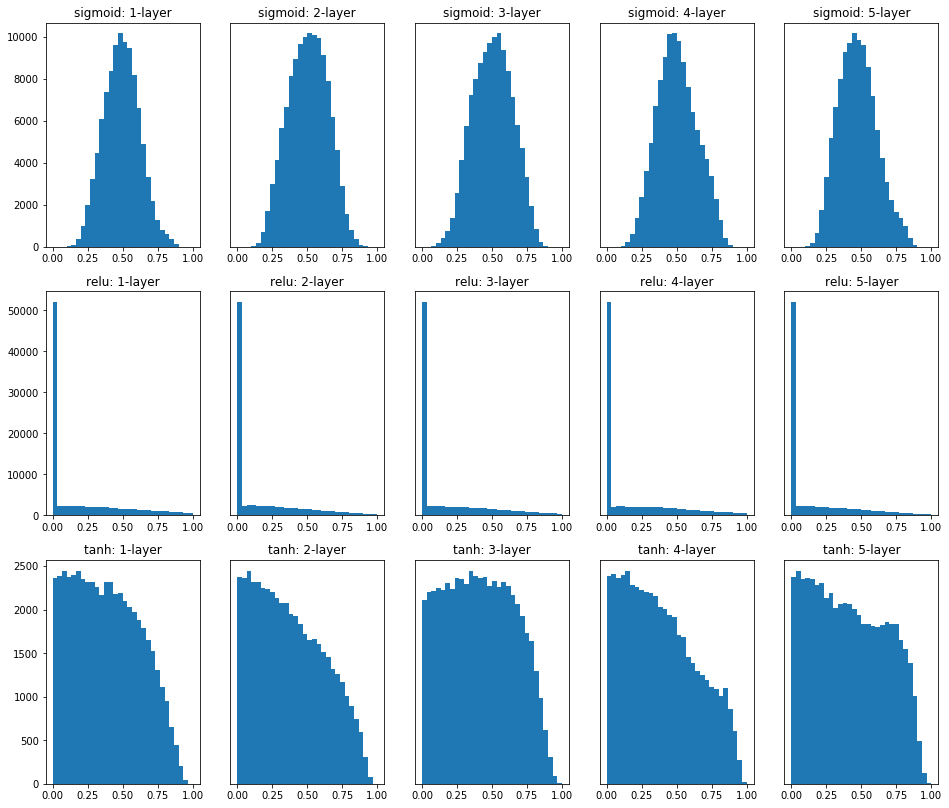

In [23]:
test_activation_distribution()